In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 80s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

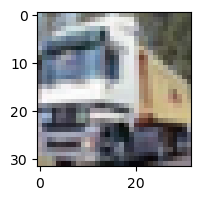

In [5]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,) # -1 doesn't change 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_train.shape

(50000,)

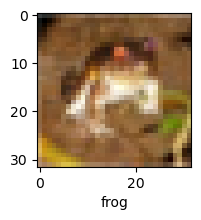

In [12]:
plot_sample(X_train,y_train,0)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ANN Model

In [ ]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ANN.compile(optimizer='adam',
           loss ='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ANN.fit(X_train,y_train,epochs=5)

C:\Users\mustafa\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1236/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 152ms/step - accuracy: 0.2668 - loss: 2.3282

In [ ]:
ANN.evaluate(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# CNN Model

In [ ]:
CNN = models.Sequential([
    # Convolutional layers
    layers.Conv2D(input_shape=(32, 32, 3),filters=32, kernel_size=(3, 3), activation='relu'), # 32 different features # it np.dot with 3x3 matrix
    layers.MaxPooling2D((2, 2)), # pooling is used for image reducing
    # Dense Layers
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
CNN.fit(X_train,y_train,epochs=5)

In [ ]:
CNN.evaluate(X_test,y_test)

In [ ]:
y_test[:5]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred = CNN.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
print(classification_report(y_test,y_classes))

In [ ]:
# Exercise
# Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: 
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb
# 
# Above we used ANN for digits classification. You need to modify this code to use CNN instead. 
# Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. 
# Once you have worked on this problem on your own, you can check my solution by clicking on this link: Solution

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
y_train[1]

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

# ANN Classification

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(units=10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(-1,28,28,1) # Must be done for CNN
X_train.shape

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

# CNN classification

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)), 
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(units=10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

In [ ]:
y_train[:5]

In [ ]:
model.evaluate(X_test,y_test)